In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [23]:
sns.set()
sns.set_style({'axes.grid': False})
image = np.array([[0, 0, 1, 0, 0], [0, 1, 0, 1, 0], [1, 0, 0, 0, 1], [0, 1, 0, 1, 0], [0, 0, 1, 0, 0]])
np.random.seed(1)


##LIF NEuron parameters and simulatio parameters 


Rm= 1e8
Cm = 1e-7
Tm = Rm * Cm
V_m = -0.055
V_rest = -0.055
V_th = -0.025
A_plus = 0.01
A_minus = -0.01
dt = 0.001
T = np.arange(0, 0.35, 0.001)
tau = 100
bins = 350

V_vec = np.zeros((len(T)))
S_vec = np.zeros_like(V_vec)

Iinj = np.zeros_like(V_vec)
spike_train = np.zeros_like(Xpre)
weights = np.repeat(0.04, 25)
dw = np.zeros_like(Xpre)
weight_plot = np.zeros_like(dw)
V_vec[0] = V_m
post_spike = 0
pre_spike = 0

w_max = 0.04

In [24]:

def gen_Poisson_spikes(img_array, fr, bins, spike_train):
    img_array = img_array.flatten()
    dt = 0.001
    for pixel in range(img_array.size):
        fr2 = fr * img_array[pixel]
        poisson_output = np.random.rand(1, bins) < fr2 * dt
        spike_train[pixel] = poisson_output.astype(int)

    return spike_train


post_status = 0
sum_weight = 0
pre_index = np.zeros_like(V_vec)
post_index = np.zeros_like(pre_index)
final_spike_train =  gen_Poisson_spikes(img_array=image,fr=100, bins=350, spike_train=spike_train)

In [25]:
for i in range(len(T) - 1):

    # synaptic scaling
    weights /= np.sum(weights) 

    # LIF neuron
    Iinj[i] = np.dot(final_spike_train[:, i], weights) 
    V_vec[i + 1] = V_vec[i] + (dt / Tm) * (V_rest - V_vec[i]) + Rm * Iinj[i]
    if V_vec[i + 1] > V_th:
        V_vec[i + 1] = V_rest
        S_vec[i + 1] = 1
        post_spike = i
    if V_vec[i + 1] <= V_rest:
        V_vec[i + 1] = V_rest
    # Updating the weights
    for j in range(25):
        
        if final_spike_train[j][i] == 1:
            pre_spike = i
            post_status = 1
        pre_index[i + 1] = pre_spike
        post_index[i + 1] = post_spike
        if post_spike - pre_spike < 0 and post_status == 1:
            dw[j][i + 1] = A_minus * np.exp((post_spike - pre_spike) / tau)
            weights[j] += dw[j][i + 1]
            post_status = 0
        elif post_spike - pre_spike >= 0 and post_status == 1:
            dw[j][i + 1] = A_plus * np.exp((pre_spike - post_spike) / tau)
            weights[j] += dw[j][i + 1]
            post_status = 0
        else:
            dw[j][i + 1] = 0
            
        weight_plot[j][i + 1] = weights[j]


[[ 0.15570023  0.15570023 -0.06453836  0.15570023  0.15570023]
 [ 0.15570023 -0.11329859  0.15570023 -0.29476484  0.15570023]
 [-0.27365027  0.15570023  0.15570023  0.15570023 -0.2441646 ]
 [ 0.15570023 -0.1923834   0.15570023 -0.32091003  0.15570023]
 [ 0.15570023  0.15570023 -0.14319388  0.15570023  0.15570023]]


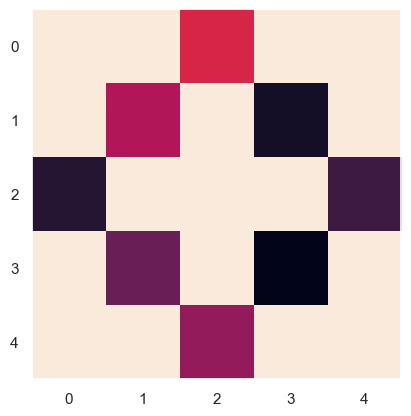

In [22]:
print(weights.reshape((5, 5)))

plt.imshow(weights.reshape((5, 5)))
plt.show()
